In [575]:
# Tourism forecast: Mexico (destination) <- USA (origin)

# Tourism forecast: Mexico (destination) <- USA (origin)

In [54]:
# Packages used in the labs
library(forecast)
library(tsutils) 

In [55]:
load("Project/dataTour.Rdata")
load("Project/IMFdata.Rdata") 

In [56]:
# Extract Mexico destination table and USA origin column 
mex <- dataTour[["Mexico"]]
y_all <- mex[,"USA"]

In [57]:
mex

            USA  Canada Colombia     UK Brazil    Rest    Total
2005 Q1 1400642  342450     8993  45994  20000 3933399  5751478
2005 Q2 1515499  120526     8634  70331  28484 3731994  5475468
2005 Q3 1287379   66019     8841  77801  19945 3877191  5337176
2005 Q4 1117800  146221     7395  37295   9597 4032487  5350795
2006 Q1 1459546  334225     7608  42253   7285 3669629  5520546
2006 Q2 1637725  128280     6969  72421   5641 3537578  5388614
2006 Q3 1286124   84528     8432  81303   6214 3470791  4937392
2006 Q4 1308877  238424    12946  64169  12750 3868818  5505984
2007 Q1 1663041  453691    13647  57964  14748 3104439  5307530
2007 Q2 1554304  145094    15444  74414  14639 3879625  5683520
2007 Q3 1223545   85857    15849  85002  15331 3700716  5126300
2007 Q4 1367226  260978    16167  65645  15301 3763033  5488350
2008 Q1 1729582  516909    15372  60746  20561 3326460  5669630
2008 Q2 1574085  182646    15827  81581  18189 4014682  5887010
2008 Q3 1179866  114711    17902  98854 

In [58]:
y <- ts(y_all, start=c(2005,1), frequency=4)

In [59]:
# Hold out 2019 as TEST; keep 2018 as VALIDATION
y.trn <- window(y, end=c(2017,4))           # training up to 2017Q4
y.val <- window(y, start=c(2018,1), end=c(2018,4))  # validation 2018
y.tst <- window(y, start=c(2019,1), end=c(2019,4)) 

In [60]:
cat("Lengths — Train:", length(y.trn), " Validation:", length(y.val), " Test:", length(y.tst), "\n")

Lengths — Train: 52  Validation: 4  Test: 4 


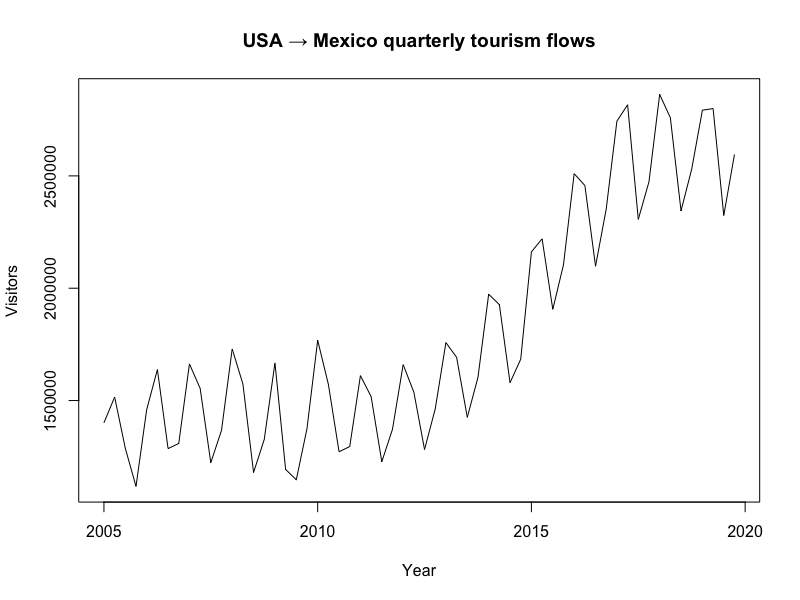

In [61]:
# Simple t
# ime plot 
plot(y, main="USA → Mexico quarterly tourism flows", xlab="Year", ylab="Visitors")

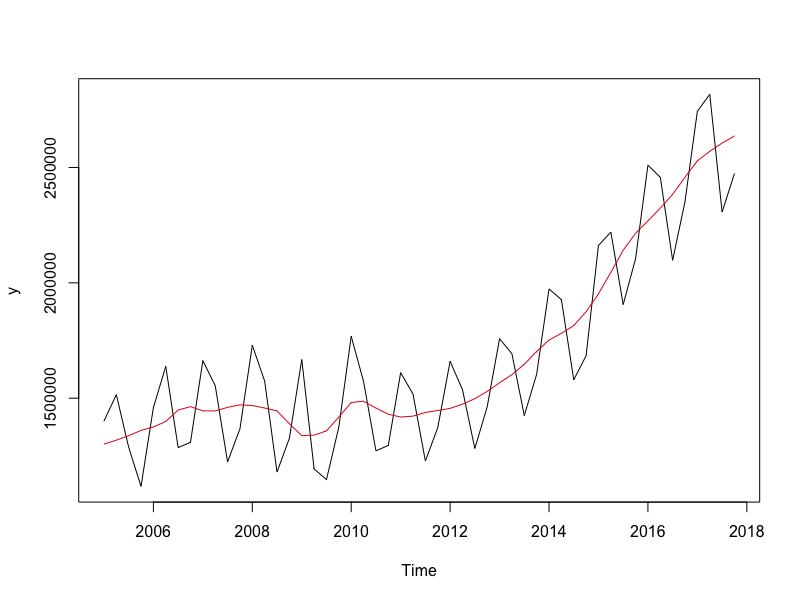

In [62]:
# Centred moving average to view trend
cma <- cmav(y.trn, outplot=1) 

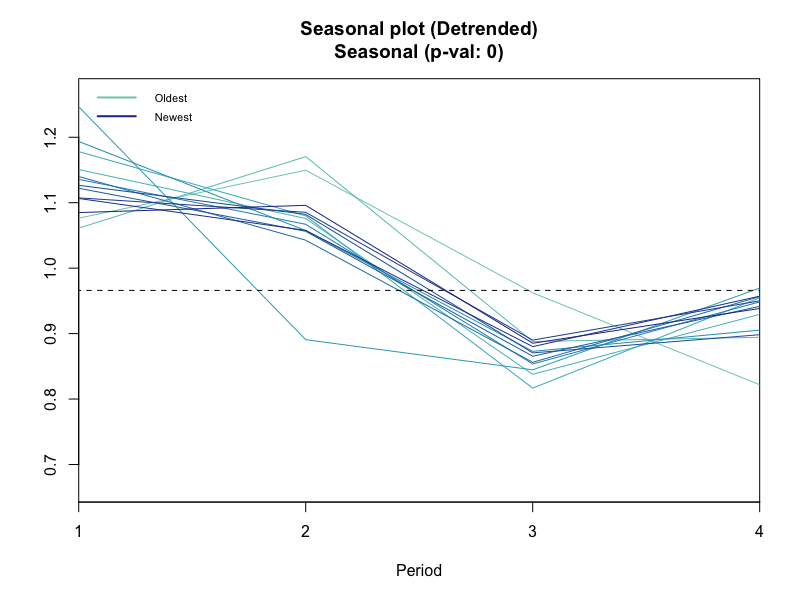

Results of statistical testing
Evidence of trend: TRUE  (pval: 0)
Evidence of seasonality: TRUE  (pval: 0)

In [63]:
# Seasonal diagnostics
seasplot(y.trn)   # seasonal diagram + significance tests

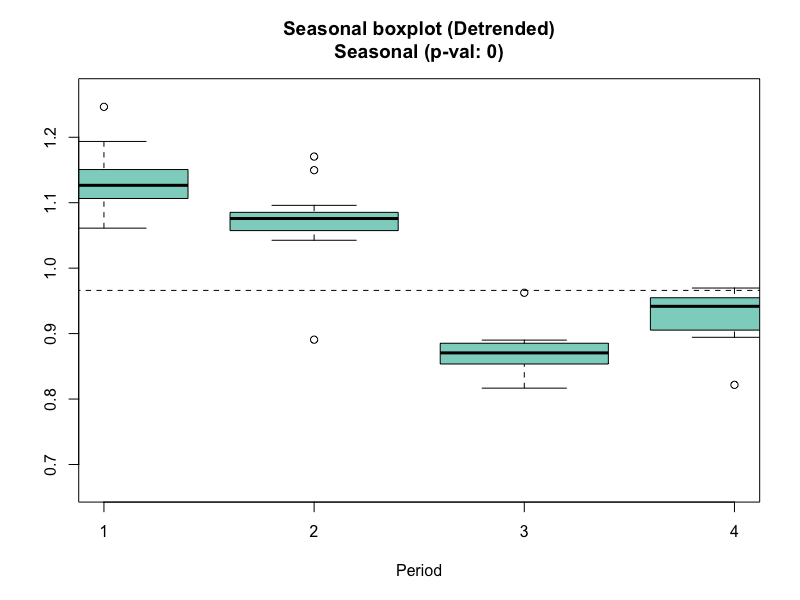

Results of statistical testing
Evidence of trend: TRUE  (pval: 0)
Evidence of seasonality: TRUE  (pval: 0)

In [64]:
seasplot(y.trn, outplot=2)  # seasonal boxplots

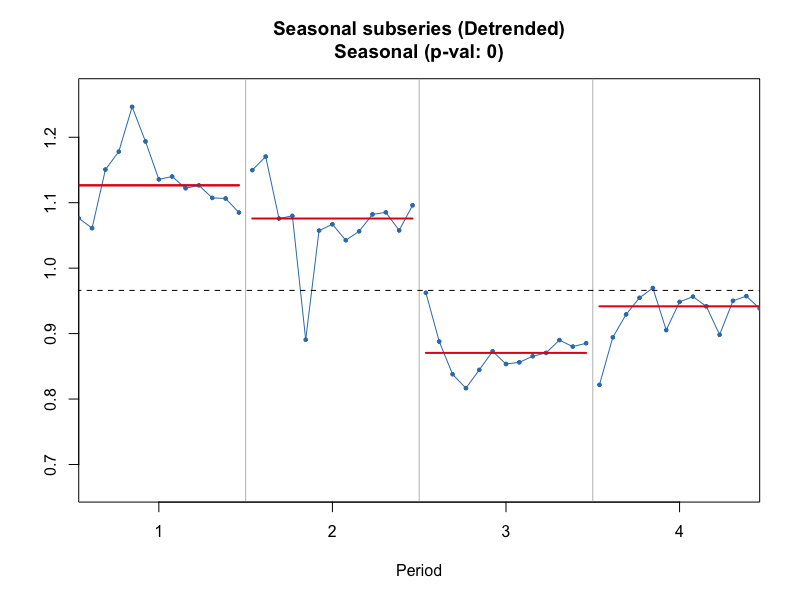

Results of statistical testing
Evidence of trend: TRUE  (pval: 0)
Evidence of seasonality: TRUE  (pval: 0)

In [65]:
seasplot(y.trn, outplot=3)  # seasonal subseries

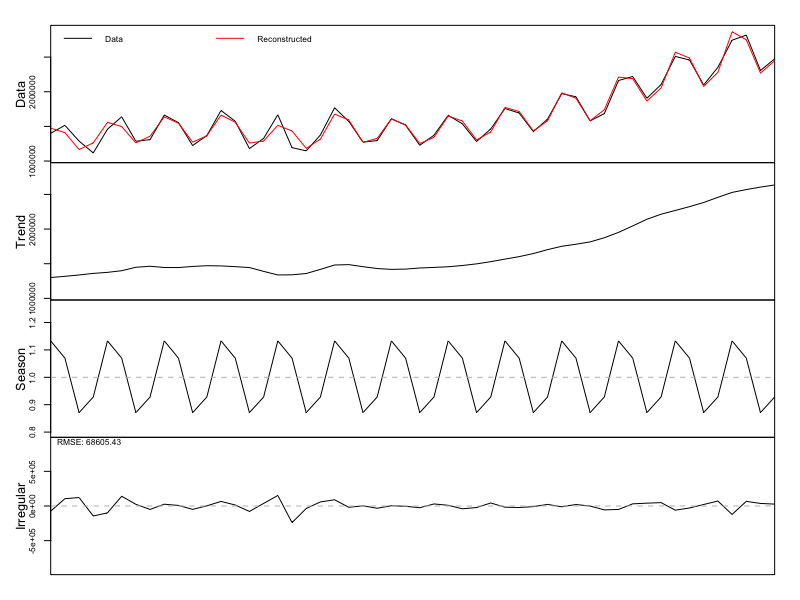

$trend
        Qtr1    Qtr2    Qtr3    Qtr4
2005 1301305 1318160 1337693 1360334
2006 1375456 1399183 1448505 1463514
2007 1445264 1444735 1460347 1471137
2008 1468150 1457607 1444762 1389414
2009 1337768 1339805 1358484 1418420
2010 1481347 1486912 1457226 1430727
2011 1418357 1422423 1438179 1446735
2012 1455984 1474151 1497749 1529437
2013 1566709 1602158 1646689 1702982
2014 1751678 1781052 1814630 1874736
2015 1952094 2045399 2141428 2214634
2016 2268312 2323349 2383620 2457742
2017 2528734 2569970 2605554 2636254

$season
          Qtr1      Qtr2      Qtr3      Qtr4
2005 1.1330274 1.0700739 0.8710229 0.9281318
2006 1.1330274 1.0700739 0.8710229 0.9281318
2007 1.1330274 1.0700739 0.8710229 0.9281318
2008 1.1330274 1.0700739 0.8710229 0.9281318
2009 1.1330274 1.0700739 0.8710229 0.9281318
2010 1.1330274 1.0700739 0.8710229 0.9281318
2011 1.1330274 1.0700739 0.8710229 0.9281318
2012 1.1330274 1.0700739 0.8710229 0.9281318
2013 1.1330274 1.0700739 0.8710229 0.9281318
2014 1.1330274 1

In [66]:
# Decomposition 
decomp(y.trn, outplot=TRUE)

## Benchmark + ETS Forecasting

In [67]:
# Seasonal-naïve benchmark
fit.sn <- snaive(y.trn, h=4)
fc.sn  <- forecast(fit.sn, h=4)

In [68]:
print(fit.sn)

        Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
2018 Q1        2743534 2507773 2979295 2382969 3104099
2018 Q2        2816609 2580848 3052370 2456044 3177174
2018 Q3        2306586 2070825 2542347 1946021 2667151
2018 Q4        2473736 2237975 2709497 2113171 2834301


In [69]:
# ETS automatic model
fit.ets <- ets(y.trn)
fc.ets  <- forecast(fit.ets, h=4)

In [70]:
print(fit.ets)

ETS(A,A,A) 

Call:
ets(y = y.trn)

  Smoothing parameters:
    alpha = 0.3267 
    beta  = 0.0809 
    gamma = 1e-04 

  Initial states:
    l = 1278652.0586 
    b = 20268.3504 
    s = -114942.6 -211485.9 118581.5 207847

  sigma:  115282.6

     AIC     AICc      BIC 
1426.913 1431.198 1444.474 


In [71]:
# Validation-year (2018) accuracy comparison
cat("\nValidation (2018) accuracy – Seasonal Naïve:\n")
print(accuracy(fc.sn, y.val))


Validation (2018) accuracy – Seasonal Naïve:
                    ME      RMSE       MAE      MPE     MAPE      MASE
Training set 104565.52 183965.11 148036.94 5.017082 8.307414 1.0000000
Test set      38992.25  74453.55  67819.75 1.480985 2.525856 0.4581272
                   ACF1 Theil's U
Training set  0.6647591        NA
Test set     -0.4757894 0.1973987


In [73]:
cat("\nValidation (2018) accuracy – ETS (auto):\n")
print(accuracy(fc.ets, y.val))


Validation (2018) accuracy – ETS (auto):
                      ME     RMSE       MAE        MPE     MAPE      MASE
Training set    7950.526 106044.5  80759.14  0.1717478 5.221433 0.5455337
Test set     -180682.634 198378.0 180682.63 -7.1646615 7.164662 1.2205240
                  ACF1 Theil's U
Training set 0.1770065        NA
Test set     0.2364612 0.8686495


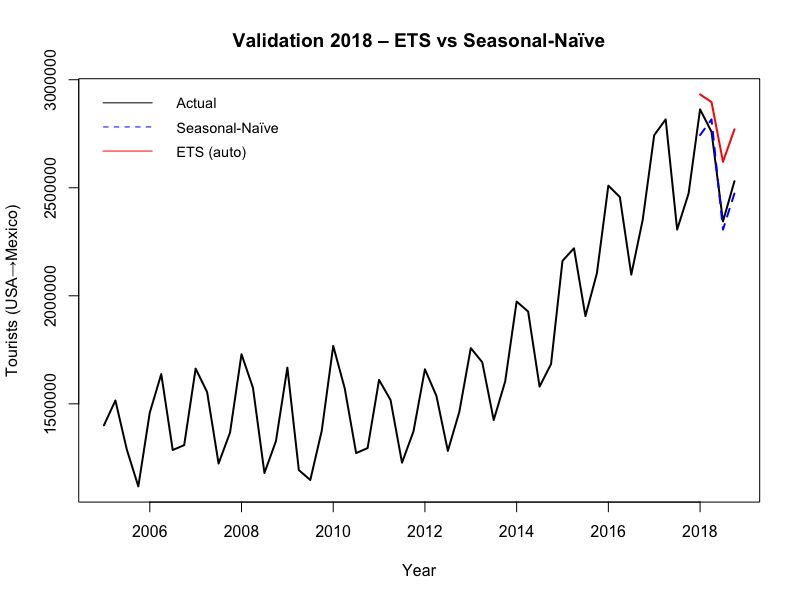

In [74]:
# Plot for visual comparison
plot(window(y, start=c(2005,1), end=c(2018,4)),
     main="Validation 2018 – ETS vs Seasonal-Naïve",
     xlab="Year", ylab="Tourists (USA→Mexico)",
     type="l", col="black", lwd=2,
     ylim=range(y, fc.sn$mean, fc.ets$mean))

lines(fc.sn$mean, col="blue", lwd=2, lty=2)
lines(fc.ets$mean, col="red", lwd=2)

legend("topleft",
       legend=c("Actual","Seasonal-Naïve","ETS (auto)"),
       col=c("black","blue","red"),
       lty=c(1,2,1), bty="n", cex=0.9)

In [75]:
y.trnval <- window(y, end=c(2018,4))

In [76]:
# Refit ETS and Seasonal-Naïve
fit.ets.final <- ets(y.trnval)
fit.sn.final  <- snaive(y.trnval, h = 4)

In [77]:
# Forecast 2019 (h = 4 quarters)
fc.ets.final <- forecast(fit.ets.final, h = 4)
fc.sn.final  <- forecast(fit.sn.final, h = 4)

In [78]:
# Evaluate performance on Test (2019)
cat("\nTest (2019) accuracy – ETS (final model):\n")
print(accuracy(fc.ets.final, y.tst))


Test (2019) accuracy – ETS (final model):
                      ME     RMSE       MAE         MPE     MAPE      MASE
Training set    4955.407 105794.5  80380.15  0.04565964 5.112715 0.5665905
Test set     -117956.984 134541.1 117956.98 -4.68118186 4.681182 0.8314654
                   ACF1 Theil's U
Training set  0.1007825        NA
Test set     -0.6333764 0.4312092


In [79]:
cat("\nTest (2019) accuracy – Seasonal-Naïve (final model):\n")
print(accuracy(fc.sn.final, y.tst))


Test (2019) accuracy – Seasonal-Naïve (final model):
                   ME      RMSE      MAE       MPE     MAPE      MASE
Training set 99521.42 177950.14 141866.4 4.7450749 7.862679 1.0000000
Test set      3742.00  53055.56  49148.0 0.1403137 1.840411 0.3464387
                   ACF1 Theil's U
Training set  0.6557261        NA
Test set     -0.4563661 0.1572142


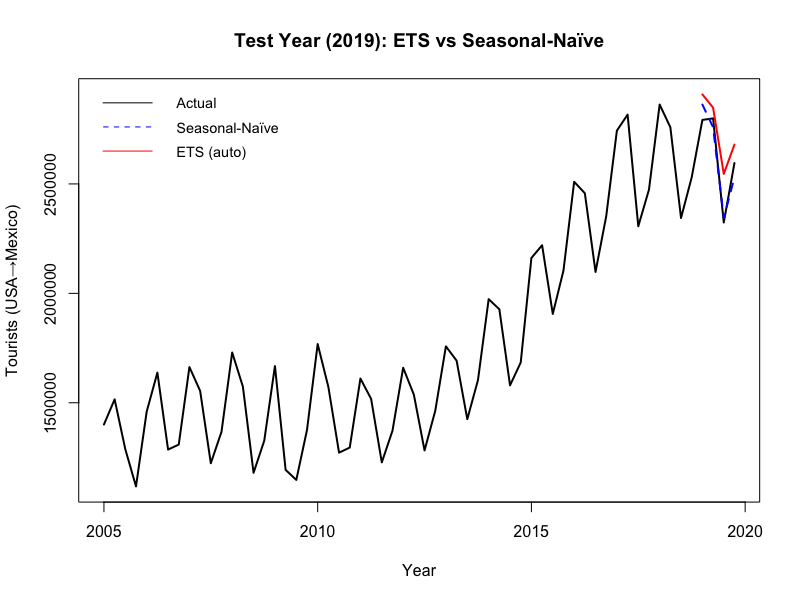

In [40]:
# Plot comparison
plot(window(y, end = c(2019,4)), type="l", col="black", lwd=2,
     main="Test Year (2019): ETS vs Seasonal-Naïve",
     xlab="Year", ylab="Tourists (USA→Mexico)",
     ylim=range(y, fc.ets.final$mean, fc.sn.final$mean))

lines(fc.sn.final$mean, col="blue", lwd=2, lty=2)
lines(fc.ets.final$mean, col="red",  lwd=2)

legend("topleft",
       legend=c("Actual","Seasonal-Naïve","ETS (auto)"),
       col=c("black","blue","red"),
       lty=c(1,2,1), bty="n", cex=0.9)

## Next Steps


	Ljung-Box test

data:  Residuals from ETS(A,A,A)
Q* = 10.365, df = 8, p-value = 0.2403

Model df: 0.   Total lags used: 8



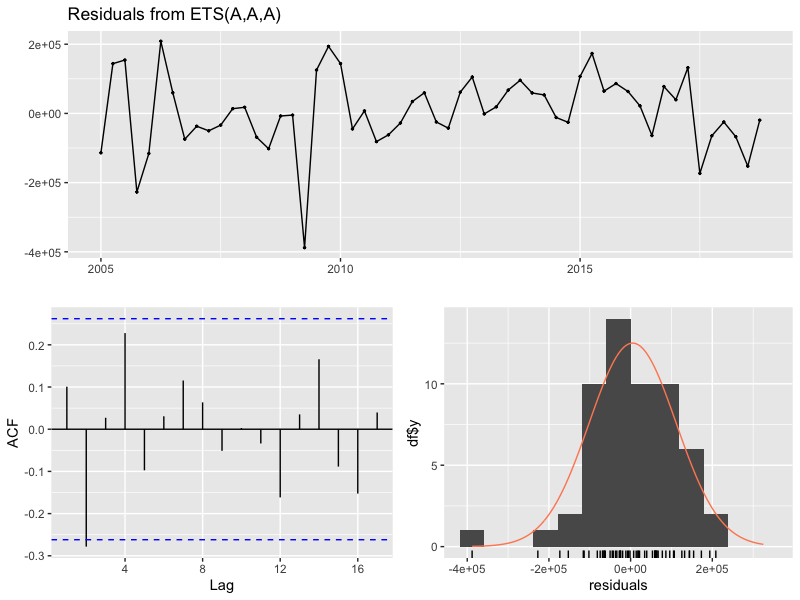

In [80]:
checkresiduals(fit.ets.final)

In [81]:
# Fit multiple ETS models
fit.AAA   <- ets(y.trnval, model="AAA")                  # Additive trend + additive season
fit.AAAd  <- ets(y.trnval, model="AAA", damped=TRUE)     # Damped additive
fit.MAM   <- ets(y.trnval, model="MAM")                  # Multiplicative error + additive trend + multiplicative season
fit.MAMd  <- ets(y.trnval, model="MAM", damped=TRUE)     # Damped multiplicative
fit.log   <- ets(log(y.trnval))                          # Log-transformed (multiplicative on original scale)

In [82]:
# Collect AIC/AICc/BIC for model comparison
ets.comp <- data.frame(
  Model = c("AAA","AAAd","MAM","MAMd","log(AAA)"),
  AIC   = c(fit.AAA$aic,  fit.AAAd$aic,  fit.MAM$aic,  fit.MAMd$aic,  fit.log$aic),
  AICc  = c(fit.AAA$aicc, fit.AAAd$aicc, fit.MAM$aicc, fit.MAMd$aicc, fit.log$aicc),
  BIC   = c(fit.AAA$bic,  fit.AAAd$bic,  fit.MAM$bic,  fit.MAMd$bic,  fit.log$bic)
)
print(ets.comp)

     Model        AIC       AICc       BIC
1      AAA 1539.17617 1543.08921 1557.4043
2     AAAd 1539.96514 1544.85403 1560.2187
3      MAM 1543.52749 1547.44053 1561.7557
4     MAMd 1545.38467 1550.27356 1565.6382
5 log(AAA)  -58.48626  -54.57322  -40.2581


In [83]:
# Identify best model by lowest AIC
best.idx <- which.min(ets.comp$AIC)
best.model <- ets.comp$Model[best.idx]
cat("\nBest ETS model by AIC:", best.model, "\n")


Best ETS model by AIC: log(AAA) 


In [84]:
# Forecasts (h = 4 quarters)
fc.AAA   <- forecast(fit.AAA,  h=4)
fc.AAAd  <- forecast(fit.AAAd, h=4)
fc.MAM   <- forecast(fit.MAM,  h=4)
fc.MAMd  <- forecast(fit.MAMd, h=4)
fc.log   <- forecast(fit.log,  h=4, biasadj=TRUE)  # bias adjustment for log model

# Compute accuracy on test (2019)
acc.test <- rbind(
  AAA   = accuracy(fc.AAA,  y.tst)["Test set",],
  AAAd  = accuracy(fc.AAAd, y.tst)["Test set",],
  MAM   = accuracy(fc.MAM,  y.tst)["Test set",],
  MAMd  = accuracy(fc.MAMd, y.tst)["Test set",],
  logETS= accuracy(fc.log,  y.tst)["Test set",]
)

print(round(acc.test, 2))

               ME       RMSE       MAE    MPE   MAPE        MASE  ACF1
AAA    -117956.98  134541.07  117957.0  -4.68   4.68        0.83 -0.63
AAAd    -44175.27   80996.98   65117.6  -1.81   2.60        0.46 -0.76
MAM    -196834.20  215910.98  196834.2  -7.38   7.38        1.39  0.20
MAMd   -165009.24  189810.91  165009.2  -6.17   6.17        1.16  0.15
logETS 2627835.66 2634963.78 2627835.7 100.00 100.00 32213413.24 -0.09
       Theil's U
AAA         0.43
AAAd        0.24
MAM         0.49
MAMd        0.39
logETS      8.31


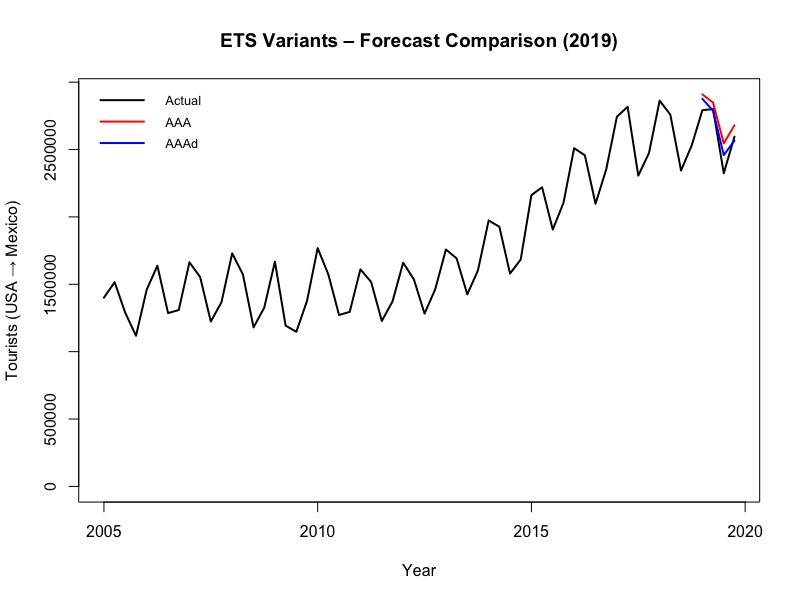

In [87]:
# --- Visual comparison of forecasts ---
plot(window(y, end=c(2019,4)), type="l", col="black", lwd=2,
     main="ETS Variants – Forecast Comparison (2019)",
     xlab="Year", ylab="Tourists (USA → Mexico)",
     ylim=range(y, fc.AAA$mean, fc.log$mean))

lines(fc.AAA$mean,  col="red",   lwd=2)
lines(fc.AAAd$mean, col="blue",  lwd=2)

legend("topleft",
       legend=c("Actual","AAA","AAAd"),
       col=c("black","red","blue","darkgreen","purple","orange"),
       lty=1, lwd=2, bty="n", cex=0.8)

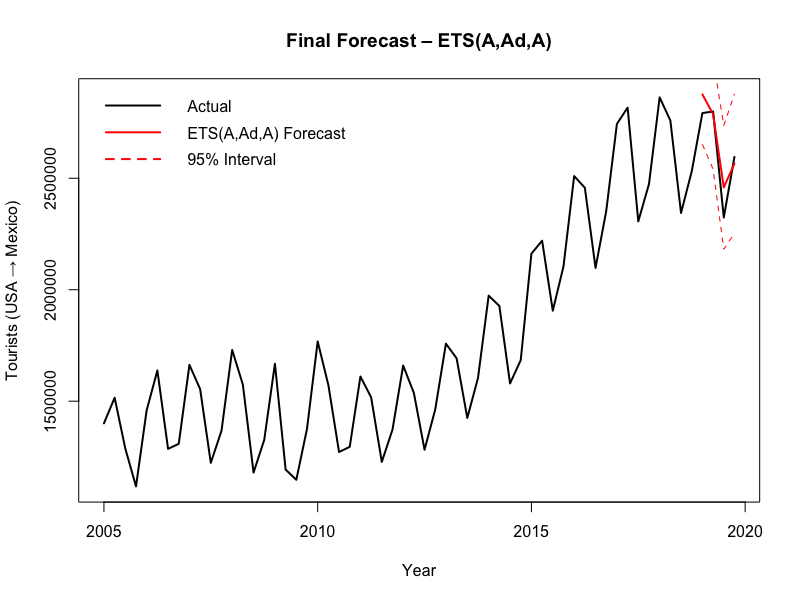

In [89]:
### Plot the best model (AAAd) forecast vs actual

plot(window(y, end=c(2019,4)), type="l", col="black", lwd=2,
     main="Final Forecast – ETS(A,Ad,A)",
     ylab="Tourists (USA → Mexico)", xlab="Year",
     ylim=range(y, fc.AAAd$mean))

lines(fc.AAAd$mean, col="red", lwd=2)
lines(fc.AAAd$lower[,2], col="red", lty=2)
lines(fc.AAAd$upper[,2], col="red", lty=2)

legend("topleft",
       legend=c("Actual","ETS(A,Ad,A) Forecast","95% Interval"),
       col=c("black","red","red"), lty=c(1,1,2), lwd=2, bty="n")

# Print the final model summary
summary(fit.AAAd)


## Dynamic / Lagged Regression

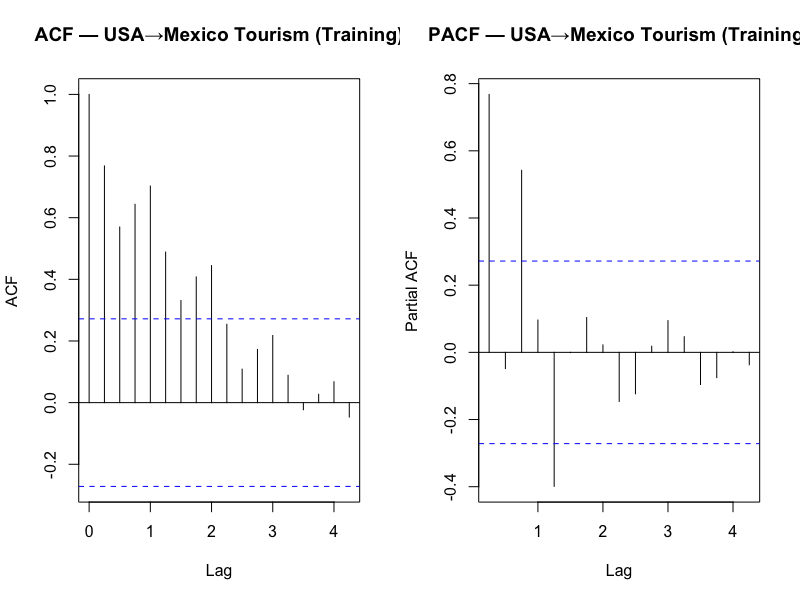

In [603]:
# Check autocorrelation
par(mfrow=c(1,2))
acf(y.trn, main="ACF — USA→Mexico Tourism (Training)")
pacf(y.trn, main="PACF — USA→Mexico Tourism (Training)")
par(mfrow=c(1,1))

In [604]:
# Construct lags 
# Build lag matrix correctly: drop early rows, keep the latest complete data
n <- length(y.trn)
X <- array(NA, c(n, 5))   # y + 4 lags

# Fill target variable (y)
X[, 1] <- y.trn

for (i in 1:4) {
  X[(i+1):n, i+1] <- y.trn[1:(n - i)]
}

colnames(X) <- c("y", paste0("lag", 1:4))
X <- as.data.frame(X)

In [605]:
X

         y    lag1    lag2    lag3    lag4
1  1400642      NA      NA      NA      NA
2  1515499 1400642      NA      NA      NA
3  1287379 1515499 1400642      NA      NA
4  1117800 1287379 1515499 1400642      NA
5  1459546 1117800 1287379 1515499 1400642
6  1637725 1459546 1117800 1287379 1515499
7  1286124 1637725 1459546 1117800 1287379
8  1308877 1286124 1637725 1459546 1117800
9  1663041 1308877 1286124 1637725 1459546
10 1554304 1663041 1308877 1286124 1637725
11 1223545 1554304 1663041 1308877 1286124
12 1367226 1223545 1554304 1663041 1308877
13 1729582 1367226 1223545 1554304 1663041
14 1574085 1729582 1367226 1223545 1554304
15 1179866 1574085 1729582 1367226 1223545
16 1326562 1179866 1574085 1729582 1367226
17 1667491 1326562 1179866 1574085 1729582
18 1193392 1667491 1326562 1179866 1574085
19 1147386 1193392 1667491 1326562 1179866
20 1375341 1147386 1193392 1667491 1326562
21 1768145 1375341 1147386 1193392 1667491
22 1572224 1768145 1375341 1147386 1193392
23 1271973 

In [606]:
X <- na.omit(X)

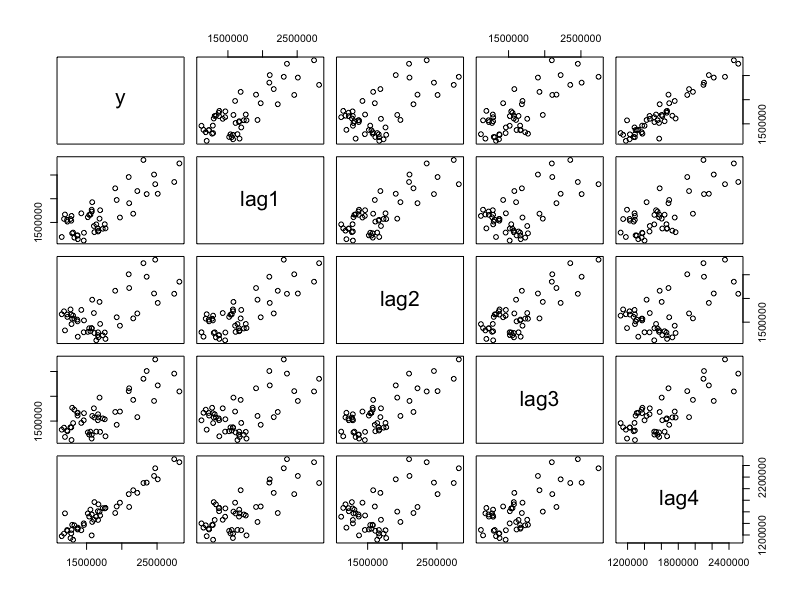

In [607]:
plot(X)

In [608]:
fit.lag.full <- lm(y ~ lag1 + lag2 + lag3 + lag4, data = X)
summary(fit.lag.full)


Call:
lm(formula = y ~ lag1 + lag2 + lag3 + lag4, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-391219  -61338   11692   69488  219156 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.998e+05  8.469e+04  -2.360  0.02290 *  
lag1         5.893e-01  1.369e-01   4.305 9.49e-05 ***
lag2        -4.700e-01  1.493e-01  -3.149  0.00298 ** 
lag3         5.711e-01  1.481e-01   3.857  0.00038 ***
lag4         4.774e-01  1.519e-01   3.144  0.00302 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 114600 on 43 degrees of freedom
Multiple R-squared:  0.9363,	Adjusted R-squared:  0.9304 
F-statistic:   158 on 4 and 43 DF,  p-value: < 2.2e-16


In [609]:
# Stepwise AIC model selection (both directions)
fit.lag.step <- step(fit.lag.full, direction = "both", trace = 0)

# Show summary of final selected model
summary(fit.lag.step)


Call:
lm(formula = y ~ lag1 + lag2 + lag3 + lag4, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-391219  -61338   11692   69488  219156 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.998e+05  8.469e+04  -2.360  0.02290 *  
lag1         5.893e-01  1.369e-01   4.305 9.49e-05 ***
lag2        -4.700e-01  1.493e-01  -3.149  0.00298 ** 
lag3         5.711e-01  1.481e-01   3.857  0.00038 ***
lag4         4.774e-01  1.519e-01   3.144  0.00302 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 114600 on 43 degrees of freedom
Multiple R-squared:  0.9363,	Adjusted R-squared:  0.9304 
F-statistic:   158 on 4 and 43 DF,  p-value: < 2.2e-16


In [610]:
# Fit simplified PACF-based model: only lag1 and lag4
fit.lag.pacf <- lm(y ~ lag1 + lag4, data = X)
summary(fit.lag.pacf)


Call:
lm(formula = y ~ lag1 + lag4, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-482827  -93086   29321   65795  270698 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.177e+05  9.046e+04  -2.406   0.0203 *  
lag1         2.046e-01  6.703e-02   3.053   0.0038 ** 
lag4         9.864e-01  8.181e-02  12.057 1.08e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 130600 on 45 degrees of freedom
Multiple R-squared:  0.9134,	Adjusted R-squared:  0.9096 
F-statistic: 237.4 on 2 and 45 DF,  p-value: < 2.2e-16


In [611]:
cat("\nAIC(full):", AIC(fit.lag.full),
    "\nAIC(step):", AIC(fit.lag.step),
    "\nAIC(PACF-guided):", AIC(fit.lag.pacf), "\n")



AIC(full): 1261.296 
AIC(step): 1261.296 
AIC(PACF-guided): 1272.009 


In [612]:
# Recursive forecast for 2018 (Validation) 
h <- length(y.val)   # 4 quarters

In [613]:
# Start with last 4 known observations from training
y.prev <- tail(y.trn, 4)

# Placeholder for forecasts
y.fc.val <- numeric(h)

# Recursive loop (1-step-ahead forecast, 4 times)
for (i in 1:h) {
  # Create new row of lags
  newX <- data.frame(
    lag1 = y.prev[4],
    lag2 = y.prev[3],
    lag3 = y.prev[2],
    lag4 = y.prev[1]
  )
  
  # Forecast one step ahead
  yhat <- predict(fit.lag.full, newdata = newX)
  y.fc.val[i] <- yhat
  
  # Update lags for next iteration
  y.prev <- c(y.prev[-1], yhat)
}

# Convert to ts object for easy plotting
y.fc.val <- ts(y.fc.val, start = c(2018, 1), frequency = 4)

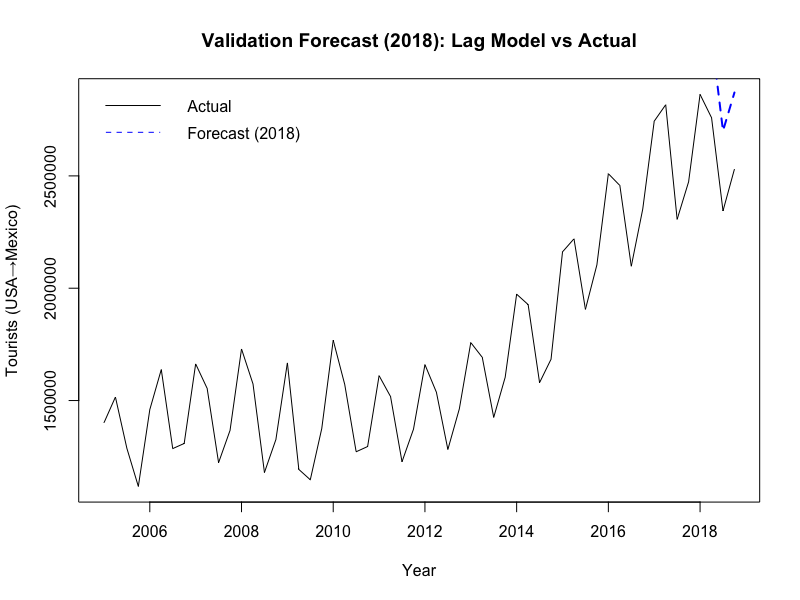

In [614]:
plot(window(y, end = c(2018, 4)),
     main = "Validation Forecast (2018): Lag Model vs Actual",
     ylab = "Tourists (USA→Mexico)", xlab = "Year")
lines(y.fc.val, col = "blue", lwd = 2, lty = 2)
legend("topleft", legend = c("Actual", "Forecast (2018)"),
       col = c("black", "blue"), lty = c(1, 2), bty = "n")

In [615]:
accuracy(y.fc.val, y.val)

                ME     RMSE      MAE       MPE     MAPE       ACF1 Theil's U
Test set -322230.8 326751.4 322230.8 -12.45353 12.45353 -0.1502024  1.335197

In [616]:
# Combine Train + Validation (up to 2018)
y.trnv <- ts(c(y.trn, y.val), start = start(y.trn), frequency = frequency(y.trn))

# Refit lag model on full data up to end of 2018
n <- length(y.trnv)
X <- array(NA, c(n, 5))  # 1 for y, 4 for lags

# Fill the first column (y)
X[, 1] <- y.trnv

# Create lag matrix
for (i in 1:4) {
  X[(i+1):n, i+1] <- y.trnv[1:(n-i)]
}

# Name columns properly
colnames(X) <- c("y", paste0("lag", 1:4))

In [617]:
Xcopy<-X

In [618]:
# Keep only complete cases
X <- X[complete.cases(X), ]

# Convert to data frame
X <- as.data.frame(X)

# Fit lag model on combined data
fit.lag.full.trnv <- lm(y ~ lag1 + lag2 + lag3 + lag4, data = X)
summary(fit.lag.full.trnv)


Call:
lm(formula = y ~ lag1 + lag2 + lag3 + lag4, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-389901  -71678    3102   82377  232513 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.142e+04  7.131e+04  -0.861 0.393449    
lag1         6.424e-01  1.358e-01   4.730 2.08e-05 ***
lag2        -5.455e-01  1.439e-01  -3.791 0.000427 ***
lag3         6.139e-01  1.428e-01   4.298 8.60e-05 ***
lag4         3.638e-01  1.443e-01   2.521 0.015165 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 119700 on 47 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9397 
F-statistic: 199.8 on 4 and 47 DF,  p-value: < 2.2e-16


In [619]:
# Recursive forecast for 2019 (Test Year)

h <- length(y.tst)   # should be 4 quarters

# Start with last 4 observed values (end of 2018)
y.prev <- tail(y.trnv, 4)

# Placeholder for forecasts
y.fc.tst <- numeric(h)

# Recursive loop
for (i in 1:h) {
  newX <- data.frame(
    lag1 = y.prev[4],
    lag2 = y.prev[3],
    lag3 = y.prev[2],
    lag4 = y.prev[1]
  )
  
  # Forecast one quarter ahead
  yhat <- predict(fit.lag.full.trnv, newdata = newX)
  y.fc.tst[i] <- yhat
  
  # Update lag history
  y.prev <- c(y.prev[-1], yhat)
}

# Convert forecasts to time series
y.fc.tst <- ts(y.fc.tst, start = c(2019, 1), frequency = 4)

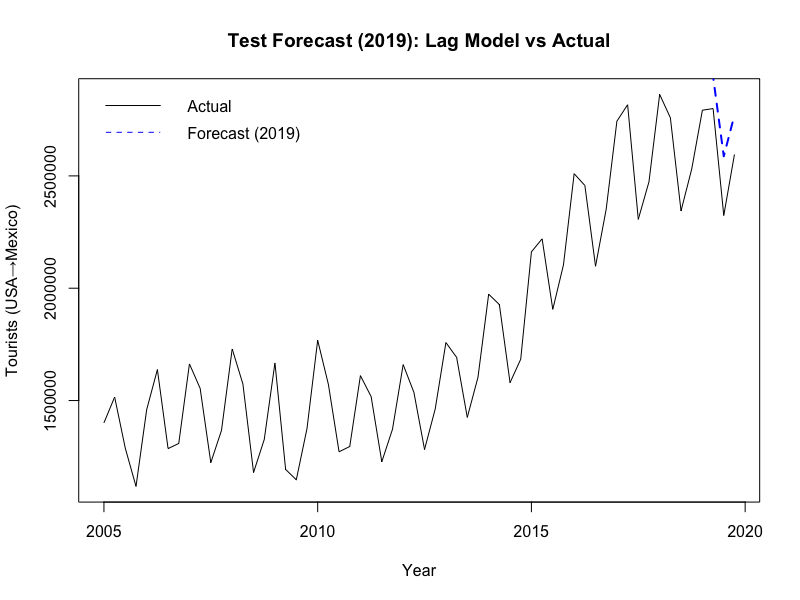

In [620]:
plot(y, main = "Test Forecast (2019): Lag Model vs Actual",
     ylab = "Tourists (USA→Mexico)", xlab = "Year")
lines(y.fc.tst, col = "blue", lwd = 2, lty = 2)
legend("topleft", legend = c("Actual", "Forecast (2019)"),
       col = c("black", "blue"), lty = c(1, 2), bty = "n")

In [621]:
accuracy(y.fc.tst, y.tst)

                ME     RMSE      MAE       MPE     MAPE       ACF1 Theil's U
Test set -202471.8 207780.7 202471.8 -7.842377 7.842377 -0.7864526 0.6351798

## Lag + Seasonal Dummy Model

In [622]:
# Create quarterly seasonal dummies (1–4)
D <- factor(rep(1:4, length.out = length(y.trnv)))

In [623]:
# Combine lag matrix (X) and dummy variable
X2 <- cbind(Xcopy, D)
X2 <- X2[complete.cases(X2), ]  # remove NAs

In [624]:
# Convert to data frame
X2 <- as.data.frame(X2)

In [625]:
# Fit full model with lags + seasonal dummies
fit.lag.dummy.full <- lm(y ~ lag1 + lag2 + lag3 + lag4 + D, data = X2)
summary(fit.lag.dummy.full)


Call:
lm(formula = y ~ lag1 + lag2 + lag3 + lag4 + D, data = X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-371696  -72396     996   79009  230432 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.285e+04  9.756e+04   0.337  0.73787    
lag1         5.953e-01  1.386e-01   4.294 8.96e-05 ***
lag2        -4.397e-01  1.612e-01  -2.727  0.00902 ** 
lag3         6.243e-01  1.416e-01   4.409 6.19e-05 ***
lag4         2.928e-01  1.516e-01   1.931  0.05972 .  
D           -3.724e+04  2.660e+04  -1.400  0.16826    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 118500 on 46 degrees of freedom
Multiple R-squared:  0.9467,	Adjusted R-squared:  0.9409 
F-statistic: 163.5 on 5 and 46 DF,  p-value: < 2.2e-16


In [626]:
# Stepwise AIC selection (both directions)
fit.lag.dummy.step <- step(fit.lag.dummy.full, direction = "both", trace = 0)
summary(fit.lag.dummy.step)


Call:
lm(formula = y ~ lag1 + lag2 + lag3 + lag4 + D, data = X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-371696  -72396     996   79009  230432 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.285e+04  9.756e+04   0.337  0.73787    
lag1         5.953e-01  1.386e-01   4.294 8.96e-05 ***
lag2        -4.397e-01  1.612e-01  -2.727  0.00902 ** 
lag3         6.243e-01  1.416e-01   4.409 6.19e-05 ***
lag4         2.928e-01  1.516e-01   1.931  0.05972 .  
D           -3.724e+04  2.660e+04  -1.400  0.16826    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 118500 on 46 degrees of freedom
Multiple R-squared:  0.9467,	Adjusted R-squared:  0.9409 
F-statistic: 163.5 on 5 and 46 DF,  p-value: < 2.2e-16


In [627]:
print(paste("AIC (Lag model on Train+Validation):", AIC(fit.lag.full.trnv)))
print(paste("AIC (Lag model with Dummies - Full):", AIC(fit.lag.dummy.full)))
print(paste("AIC (Lag model with Dummies - Stepwise):", AIC(fit.lag.dummy.step)))

[1] "AIC (Lag model on Train+Validation): 1370.34052523345"
[1] "AIC (Lag model with Dummies - Full): 1370.17114418334"
[1] "AIC (Lag model with Dummies - Stepwise): 1370.17114418334"


In [628]:
for (i in 1:h) {
  # Create quarterly dummy for the forecasted quarter
  q_i <- ((length(y.trnv) + i - 1) %% 4) + 1   # quarter index (1–4)

  # --- FIX HERE ---
  # If 'D' was a factor in the training data, keep same levels
  if ("D" %in% names(fit.lag.dummy.step$xlevels)) {
    D <- factor(q_i, levels = fit.lag.dummy.step$xlevels$D)
  } else {
    D <- q_i  # if model used numeric dummy (e.g., as.numeric(D))
  }

  # Build new data row using previous 4 values
  newX <- data.frame(
    lag1 = y.prev[4],
    lag2 = y.prev[3],
    lag3 = y.prev[2],
    lag4 = y.prev[1],
    D = D
  )

  # Forecast next quarter
  yhat <- predict(fit.lag.dummy.step, newdata = newX)
  y.fc.tst.dummy[i] <- yhat

  # Update lag history for next step
  y.prev <- c(y.prev[-1], yhat)
}

In [629]:
# Convert forecasts to quarterly time series
y.fc.tst.dummy <- ts(y.fc.tst.dummy, start = c(2019, 1), frequency = 4)

In [630]:
# Evaluate forecast accuracy
accuracy(y.fc.tst.dummy, y.tst)

                ME   RMSE      MAE       MPE     MAPE       ACF1 Theil's U
Test set -436024.2 441415 436024.2 -16.86554 16.86554 -0.5007146  1.423165

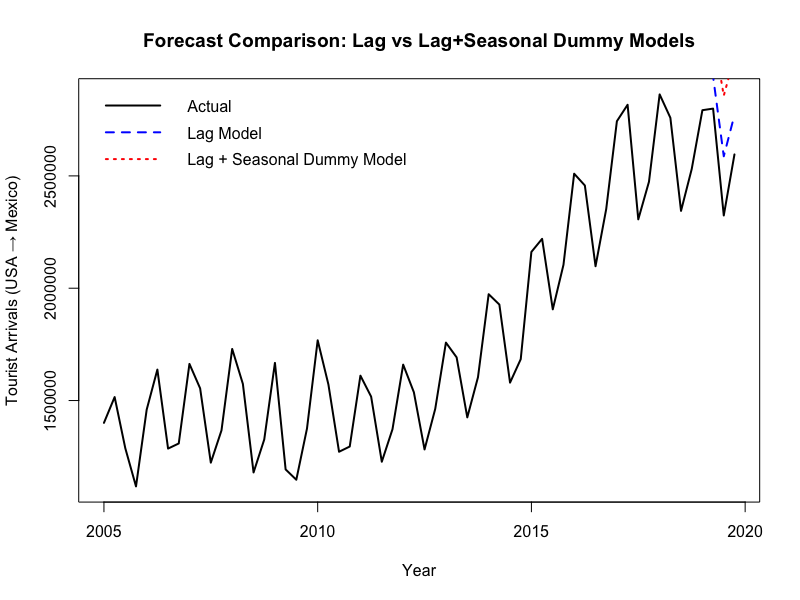

In [631]:
# PLOT: Actual vs Forecasts (Lag vs Lag+Dummy Models)

# Combine the full actual data and both forecasts
plot(window(y, end = c(2019, 4)),
     main = "Forecast Comparison: Lag vs Lag+Seasonal Dummy Models",
     ylab = "Tourist Arrivals (USA → Mexico)", xlab = "Year",
     col = "black", lwd = 2)

# Add lag-only model forecast (blue)
lines(y.fc.tst, col = "blue", lwd = 2, lty = 2)

# Add lag+dummy model forecast (red)
lines(y.fc.tst.dummy, col = "red", lwd = 2, lty = 3)

# Add legend
legend("topleft",
       legend = c("Actual", "Lag Model", "Lag + Seasonal Dummy Model"),
       col = c("black", "blue", "red"),
       lwd = c(2, 2, 2), lty = c(1, 2, 3), bty = "n")


## Regression with external IMF variables

In [632]:
load("Project/IMFdata.Rdata") 

In [633]:
colnames(X[["Mexico"]])

[1] "Gross domestic product, constant prices (National currency (Billions))"                            
[2] "Gross domestic product, constant prices (Percent change (%))"                                      
[3] "Gross domestic product, current prices (Purchasing power parity; international dollars (Billions))"
[4] "Implied PPP conversion rate (National currency per current international dollar)"                  
[5] "Inflation, average consumer prices (Index)"                                                        
[6] "Inflation, average consumer prices (Percent change (%))"                                           
[7] "Inflation, end of period consumer prices (Index)"                                                  

In [634]:
colnames(X[["USA"]])

[1] "Gross domestic product, constant prices (National currency (Billions))"                            
[2] "Gross domestic product, constant prices (Percent change (%))"                                      
[3] "Gross domestic product, current prices (Purchasing power parity; international dollars (Billions))"
[4] "Implied PPP conversion rate (National currency per current international dollar)"                  
[5] "Inflation, average consumer prices (Index)"                                                        
[6] "Inflation, average consumer prices (Percent change (%))"                                           
[7] "Inflation, end of period consumer prices (Index)"                                                  

In [635]:
str(X)

List of 46
 $ New Zealand   : Time-Series [1:45, 1:7] from 1980 to 2024: 90.2 92.9 95.5 95.4 102 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "Gross domestic product, constant prices (National currency (Billions))" "Gross domestic product, constant prices (Percent change (%))" "Gross domestic product, current prices (Purchasing power parity; international dollars (Billions))" "Implied PPP conversion rate (National currency per current international dollar)" ...
 $ Australia     : Time-Series [1:45, 1:7] from 1980 to 2024: 566 590 590 587 625 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "Gross domestic product, constant prices (National currency (Billions))" "Gross domestic product, constant prices (Percent change (%))" "Gross domestic product, current prices (Purchasing power parity; international dollars (Billions))" "Implied PPP conversion rate (National currency per current international dollar)" ...
 $ Sweden        : 

In [636]:
# Extract relevant macroeconomic variables

# USA GDP growth (%)
usa_gdp_growth <- X[["USA"]][, 2]  # 2nd column: "Gross domestic product, constant prices (Percent change %)"
# Mexico Inflation (%)
mex_inflation <- X[["Mexico"]][, 6]  # 6th column: "Inflation, average consumer prices (Percent change %)"
# Mexico PPP
mex_ppp <- X[["Mexico"]][, 4]  # 4th column: "Implied PPP conversion rate (National currency per current international dollar)"

In [637]:
usa_gdp_growth

Time Series:
Start = 1980 
End = 2024 
Frequency = 1 
 [1] -0.257  2.538 -1.802  4.584  7.237  4.169  3.463  3.460  4.177  3.673
[11]  1.886 -0.108  3.522  2.753  4.029  2.684  3.772  4.447  4.481  4.753
[21]  4.127  0.999  1.742  2.861  3.799  3.513  2.855  1.876 -0.137 -2.537
[31]  2.564  1.551  2.249  1.842  2.526  2.908  1.638  2.370  2.927  2.334
[41] -5.907  4.739     NA     NA     NA

In [638]:
# Convert from annual to quarterly
usa_gdp_q <- rep(usa_gdp_growth, each = 4)
mex_infl_q <- rep(mex_inflation, each = 4)
mex_ppp_q <- rep(mex_ppp, each = 4)

In [639]:
# Convert to quarterly time series using original IMF start year
usa_gdp_q <- ts(usa_gdp_q, start = c(1980, 1), frequency = 4)
mex_infl_q <- ts(mex_infl_q, start = c(1980, 1), frequency = 4)
mex_ppp_q <- ts(mex_ppp_q, start = c(1980, 1), frequency = 4)

In [640]:
# Trim to your tourism window (2005–2019)
usa_gdp_q <- window(usa_gdp_q, start = c(2005, 1), end = c(2019, 4))
mex_infl_q <- window(mex_infl_q, start = c(2005, 1), end = c(2019, 4))
mex_ppp_q <- window(mex_ppp_q, start = c(2005, 1), end = c(2019, 4))

In [641]:
usa_gdp_q

       Qtr1   Qtr2   Qtr3   Qtr4
2005  3.513  3.513  3.513  3.513
2006  2.855  2.855  2.855  2.855
2007  1.876  1.876  1.876  1.876
2008 -0.137 -0.137 -0.137 -0.137
2009 -2.537 -2.537 -2.537 -2.537
2010  2.564  2.564  2.564  2.564
2011  1.551  1.551  1.551  1.551
2012  2.249  2.249  2.249  2.249
2013  1.842  1.842  1.842  1.842
2014  2.526  2.526  2.526  2.526
2015  2.908  2.908  2.908  2.908
2016  1.638  1.638  1.638  1.638
2017  2.370  2.370  2.370  2.370
2018  2.927  2.927  2.927  2.927
2019  2.334  2.334  2.334  2.334

In [642]:
# Checking the correlations
df_corr <- data.frame(
  Tourists = as.numeric(window(y, end = c(2019, 4))),
  USA_GDP_Growth = as.numeric(usa_gdp_q),
  MEX_Inflation = as.numeric(mex_infl_q),
  MEX_PPP = as.numeric(mex_ppp_q)
)

df_corr <- na.omit(df_corr)

In [643]:
corr_mat <- round(cor(df_corr), 3)
print(corr_mat)


               Tourists USA_GDP_Growth MEX_Inflation MEX_PPP
Tourists          1.000          0.283         0.050   0.855
USA_GDP_Growth    0.283          1.000        -0.387   0.177
MEX_Inflation     0.050         -0.387         1.000   0.038
MEX_PPP           0.855          0.177         0.038   1.000


trying URL 'https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.5/corrplot_0.95.tgz'
Content type 'application/x-gzip' length 3828777 bytes (3.7 MB)
downloaded 3.7 MB




The downloaded binary packages are in
	/var/folders/2_/jvtbgf851vd17xh1zq6dfx4m0000gn/T//RtmpMtBrJJ/downloaded_packages


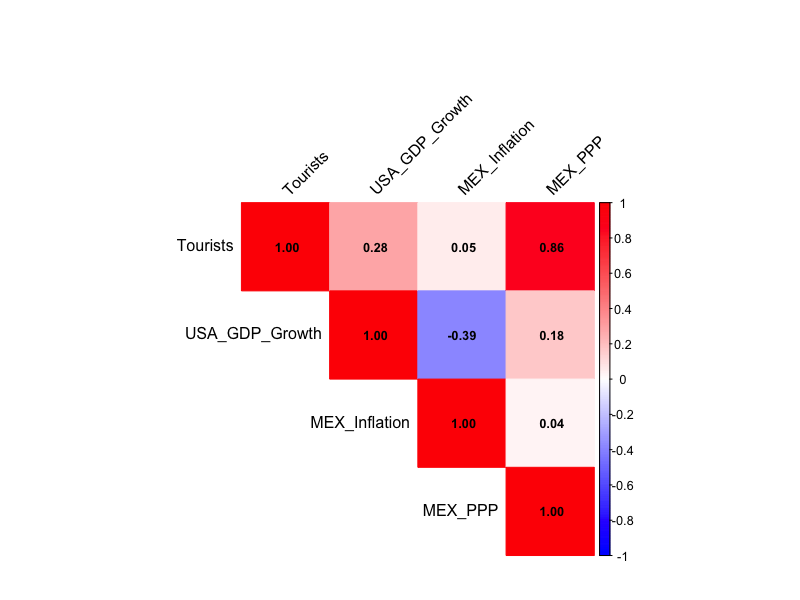

In [644]:
install.packages("corrplot")
library(corrplot)
corrplot(corr_mat, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         addCoef.col = "black", number.cex = 0.8,
         col = colorRampPalette(c("blue", "white", "red"))(200))

| Variable           | Corr. with Tourists | Strength  | Interpretation                                                                                                        |
| ------------------ | ------------------- | --------- | --------------------------------------------------------------------------------------------------------------------- |
| **USA GDP Growth** | **+0.283**          | Moderate  | When the U.S. economy grows, outbound tourism rises                                            |
| **MEX Inflation**  | **+0.05**           | Very weak | Inflation in Mexico doesn’t show much direct relation to inbound U.S. tourists. Likely not significant.               |
| **MEX PPP**        | **+0.855**          | Strong    | Very strong positive relationship - higher PPP (cheaper real cost for visitors) coincides with higher tourist inflow. |


In [645]:
# Split into train (<=2018) and test (=2019)
y.trn <- window(y, end = c(2018, 4))
y.tst <- window(y, start = c(2019, 1), end = c(2019, 4))

usa_gdp_trn <- window(usa_gdp_q, end = c(2018, 4))
mex_ppp_trn <- window(mex_ppp_q, end = c(2018, 4))

usa_gdp_tst <- window(usa_gdp_q, start = c(2019, 1), end = c(2019, 4))
mex_ppp_tst <- window(mex_ppp_q, start = c(2019, 1), end = c(2019, 4))

In [646]:
# Combine into data frame
data_trn <- data.frame(
  y = as.numeric(y.trn),
  usa_gdp = as.numeric(usa_gdp_trn),
  mex_ppp = as.numeric(mex_ppp_trn)
)

# Fit multiple regression model
fit.macro <- lm(y ~ usa_gdp + mex_ppp, data = data_trn)
summary(fit.macro)


Call:
lm(formula = y ~ usa_gdp + mex_ppp, data = data_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-573605 -156570    8012  203894  471438 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1823648     326116  -5.592 8.01e-07 ***
usa_gdp        48807      24542   1.989   0.0519 .  
mex_ppp       455614      42965  10.604 1.04e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 268900 on 53 degrees of freedom
Multiple R-squared:  0.7043,	Adjusted R-squared:  0.6931 
F-statistic: 63.12 on 2 and 53 DF,  p-value: 9.493e-15


In [647]:
AIC(fit.macro)

[1] 1564.06

In [648]:
# Create test data frame
data_tst <- data.frame(
  usa_gdp = as.numeric(usa_gdp_tst),
  mex_ppp = as.numeric(mex_ppp_tst)
)

# Generate forecasts for 2019
y.fc.macro <- predict(fit.macro, newdata = data_tst)
y.fc.macro <- ts(y.fc.macro, start = c(2019, 1), frequency = 4)

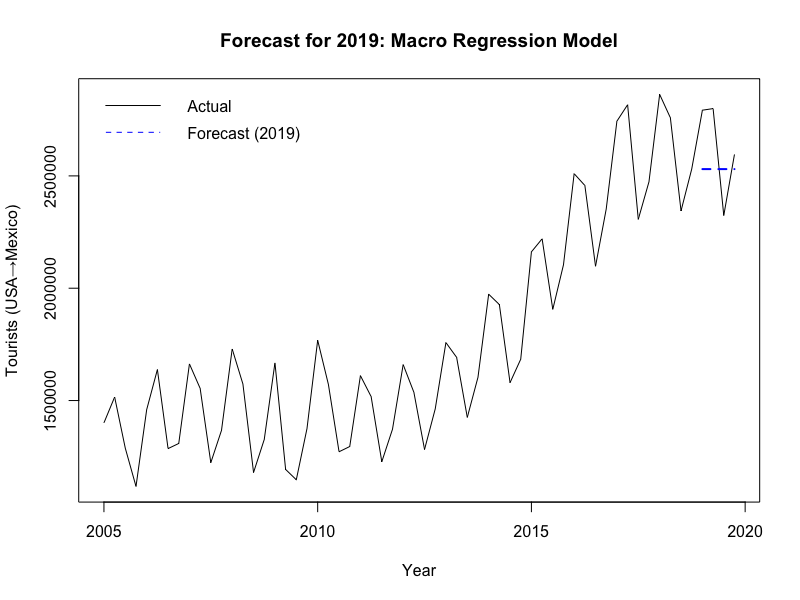

In [649]:
plot(y, main = "Forecast for 2019: Macro Regression Model",
     ylab = "Tourists (USA→Mexico)", xlab = "Year")
lines(y.fc.macro, col = "blue", lwd = 2, lty = 2)
legend("topleft", legend = c("Actual", "Forecast (2019)"),
       col = c("black", "blue"), lty = c(1, 2), bty = "n")


In [650]:
accuracy(y.fc.macro, y.tst)

               ME     RMSE      MAE   MPE     MAPE        ACF1 Theil's U
Test set 97634.75 216901.9 200833.1 3.162 7.602895 -0.09411912 0.6040581

## Combine evaluation for all models

In [653]:
# Collect AICs from each fitted model object
aic_ets_auto  <- AIC(fit.ets.auto)         # ETS (AAA)
aic_ets_aada  <- AIC(fit.ets.AAdA)         # ETS (AAdA)
aic_ets_mam   <- AIC(fit.ets.MAM)          # ETS (MAM)
aic_lag_trnv  <- AIC(fit.lag.full.trnv)    # Lag model (Train+Validation)
aic_lag_dum_f <- AIC(fit.lag.dummy.full)   # Lag + Dummy (Full)
aic_lag_dum_s <- AIC(fit.lag.dummy.step)   # Lag + Dummy (Stepwise)
aic_macro     <- AIC(fit.macro)            # Macro model

In [657]:
# Collect AICs automatically from fitted models
aic_values <- c(
  AIC(fit.ets.auto),          # ETS (AAA)
  AIC(fit.ets.AAdA),          # ETS (AAdA)
  AIC(fit.ets.MAM),           # ETS (MAM)
  AIC(fit.lag.full.trnv),     # Lag Model
  AIC(fit.lag.dummy.full),    # Lag + Seasonal Dummies (Full)
  AIC(fit.lag.dummy.step),    # Lag + Seasonal Dummies (Stepwise)
  AIC(fit.macro)              # Macroeconomic Regression
)

# Model names corresponding to the AICs
model_names <- c(
  "ETS (AAA)",
  "ETS (AAdA - Damped)",
  "ETS (MAM)",
  "Lag Model (Train+Validation)",
  "Lag + Seasonal Dummies (Full)",
  "Lag + Seasonal Dummies (Stepwise)",
  "Macro Regression"
)

In [658]:
# Combine into a dataframe
aic_df <- data.frame(Model = model_names, AIC = aic_values)

In [659]:

# Display AIC summary
cat("\n===== AIC Comparison Across Models =====\n")
print(aic_df)
cat("\nLowest AIC Model:", aic_df$Model[which.min(aic_df$AIC)], 
    "=", min(aic_df$AIC), "\n")


===== AIC Comparison Across Models =====
                              Model      AIC
1                         ETS (AAA) 1426.913
2               ETS (AAdA - Damped) 1428.951
3                         ETS (MAM) 1428.361
4      Lag Model (Train+Validation) 1370.341
5     Lag + Seasonal Dummies (Full) 1370.171
6 Lag + Seasonal Dummies (Stepwise) 1370.171
7                  Macro Regression 1564.060

Lowest AIC Model: Lag + Seasonal Dummies (Full) = 1370.171 


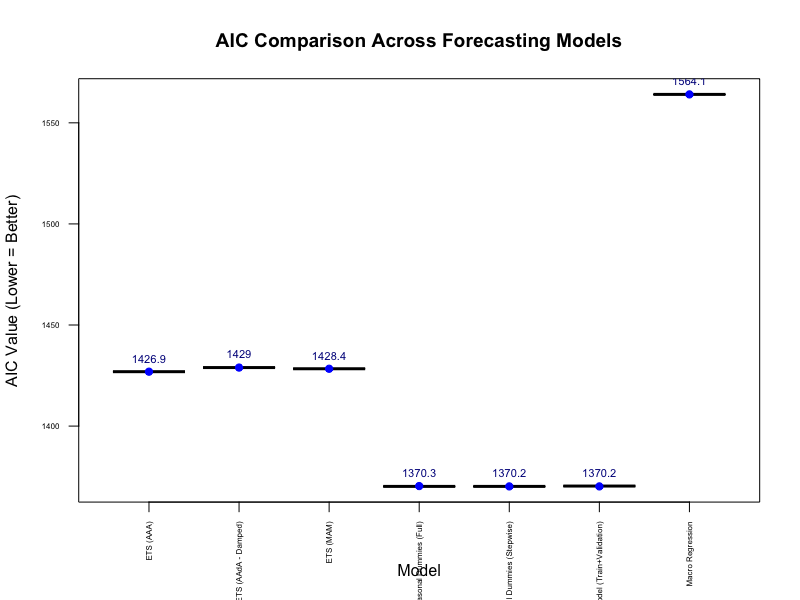

In [663]:
# --- Boxplot for AICs (Lab-style visualisation) ---
boxplot(AIC ~ Model, data = aic_df,
        col = "lightblue",
        main = "AIC Comparison Across Forecasting Models",
        ylab = "AIC Value (Lower = Better)",
        las = 2, cex.axis = 0.5)

# Overlay points for clarity
points(1:length(aic_values), aic_values, pch = 19, col = "blue")
text(1:length(aic_values), aic_values, labels = round(aic_values, 1), 
     pos = 3, cex = 0.7, col = "darkblue")

In [664]:
# Compute forecast errors for Test Set (2019)

# True values
actual <- y.tst

# Forecasts from all models
ets_fc     <- fc.ets.final$mean
naive_fc   <- fc.sn.final$mean
lag_fc     <- y.fc.tst
lagdum_fc  <- y.fc.tst.dummy
macro_fc   <- y.fc.macro

In [665]:
# Compute error metrics (MAE, RMSE, MSE) 
calc_errors <- function(actual, forecast) {
  e <- actual - forecast
  mae <- mean(abs(e), na.rm = TRUE)
  rmse <- sqrt(mean(e^2, na.rm = TRUE))
  mse <- mean(e^2, na.rm = TRUE)
  return(c(MAE = mae, RMSE = rmse, MSE = mse))
}

err_ets    <- calc_errors(actual, ets_fc)
err_naive  <- calc_errors(actual, naive_fc)
err_lag    <- calc_errors(actual, lag_fc)
err_lagdum <- calc_errors(actual, lagdum_fc)
err_macro  <- calc_errors(actual, macro_fc)

# Combine results into error matrix
error_matrix <- rbind(
  "ETS (AAA)"                       = err_ets,
  "Naive Seasonal"                  = err_naive,
  "Regression: Lag"                 = err_lag,
  "Regression: Lag + Dummies"       = err_lagdum,
  "Macro Regression"                = err_macro
)

In [666]:
# Print the results neatly
cat("\n===== Forecast Error Comparison (Test Set 2019) =====\n")
print(round(error_matrix, 4))


===== Forecast Error Comparison (Test Set 2019) =====
                               MAE      RMSE          MSE
ETS (AAA)                 117957.0 134541.07  18101300037
Naive Seasonal             49148.0  53055.56   2814892921
Regression: Lag           202471.8 207780.73  43172830686
Regression: Lag + Dummies 436024.2 441415.04 194847239884
Macro Regression          200833.1 216901.90  47046434410


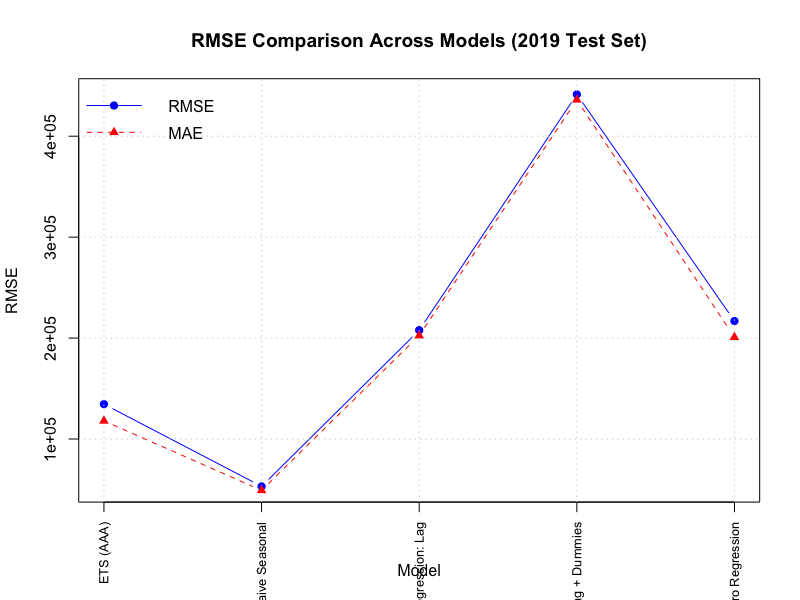

In [669]:
plot(error_matrix[, "RMSE"], type = "b", pch = 19, col = "blue",
     xaxt = "n", xlab = "Model", ylab = "RMSE",
     main = "RMSE Comparison Across Models (2019 Test Set)")
axis(1, at = 1:nrow(error_matrix), labels = rownames(error_matrix), las = 2, cex.axis = 0.8)
grid()

# Add MAE for reference on same plot (optional)
lines(error_matrix[, "MAE"], type = "b", pch = 17, col = "red", lty = 2)
legend("topleft", legend = c("RMSE", "MAE"),
       col = c("blue", "red"), pch = c(19, 17), lty = c(1, 2), bty = "n")